# Mô tả lại bài tập: Assignment 2: Bias-Variance Trade-off

## Experiment 1: N = 10

- Tạo 3 bộ dữ liệu D1, D2, D3.
- Mỗi bộ dữ liệu gồm 1 tập train N điểm dữ liệu, 1 tập test N điểm dữ liệu.
- Mỗi điểm dữ liệu có dạng (x, y)
- $x = random(0, 1)$ 
- $y = f(x) = sin(1 + x^2) + \epsilon$ với $\epsilon$ tuân theo phân phối chuẩn $N(0, \sigma=0.03$).
- Mỗi bộ dữ liêu D1, D2, D3 sử dụng tập train để huấn luyện 9 mô hình **polynomial regression có bậc từ 1-9**
- Plog minh họa 9 đồ thị trong một hình.
- 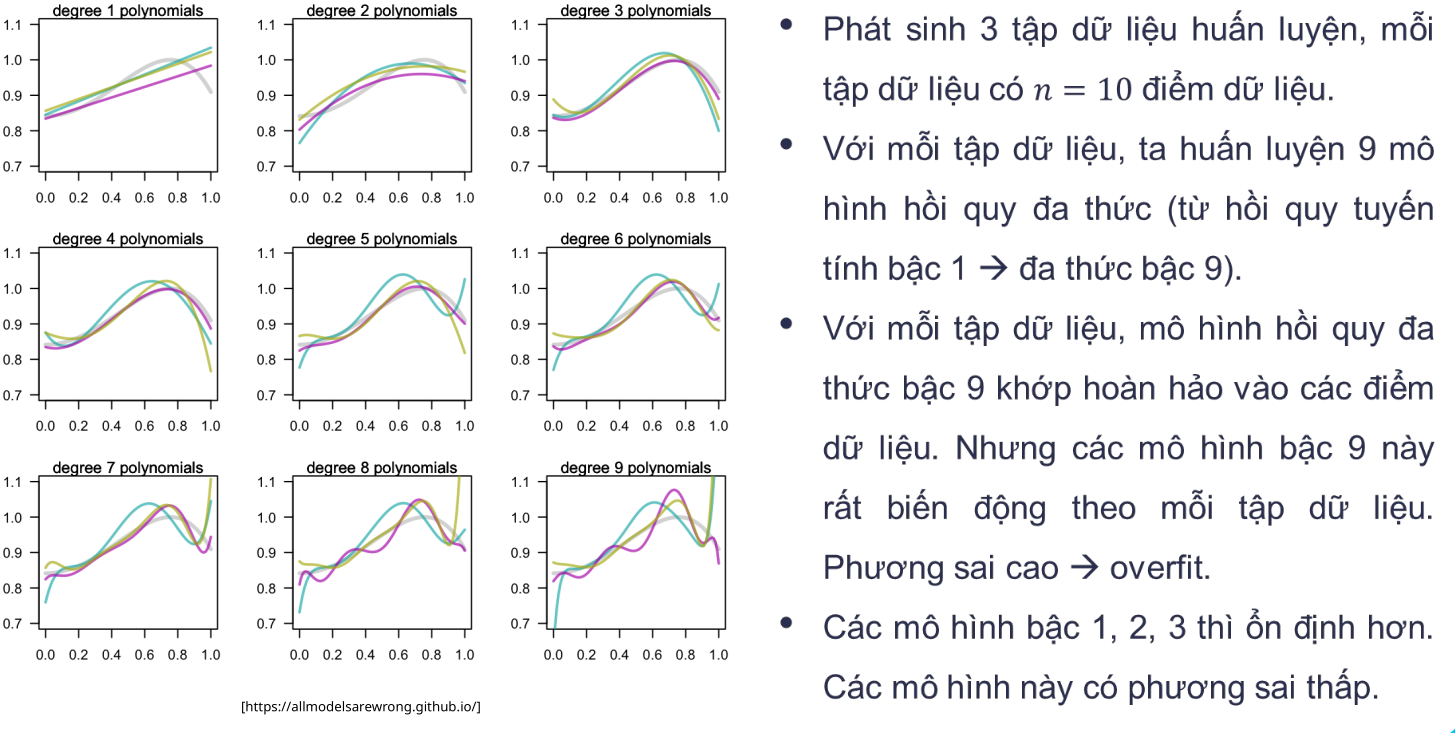
- Với bộ D1, tính giá trị $E_{in}$ (sử dụng tập train) và $E_{out}$ (sử dụng tập test) tương ứng cho 9 mô hình và tạo ra 1 bảng thống kê kết quả:
- 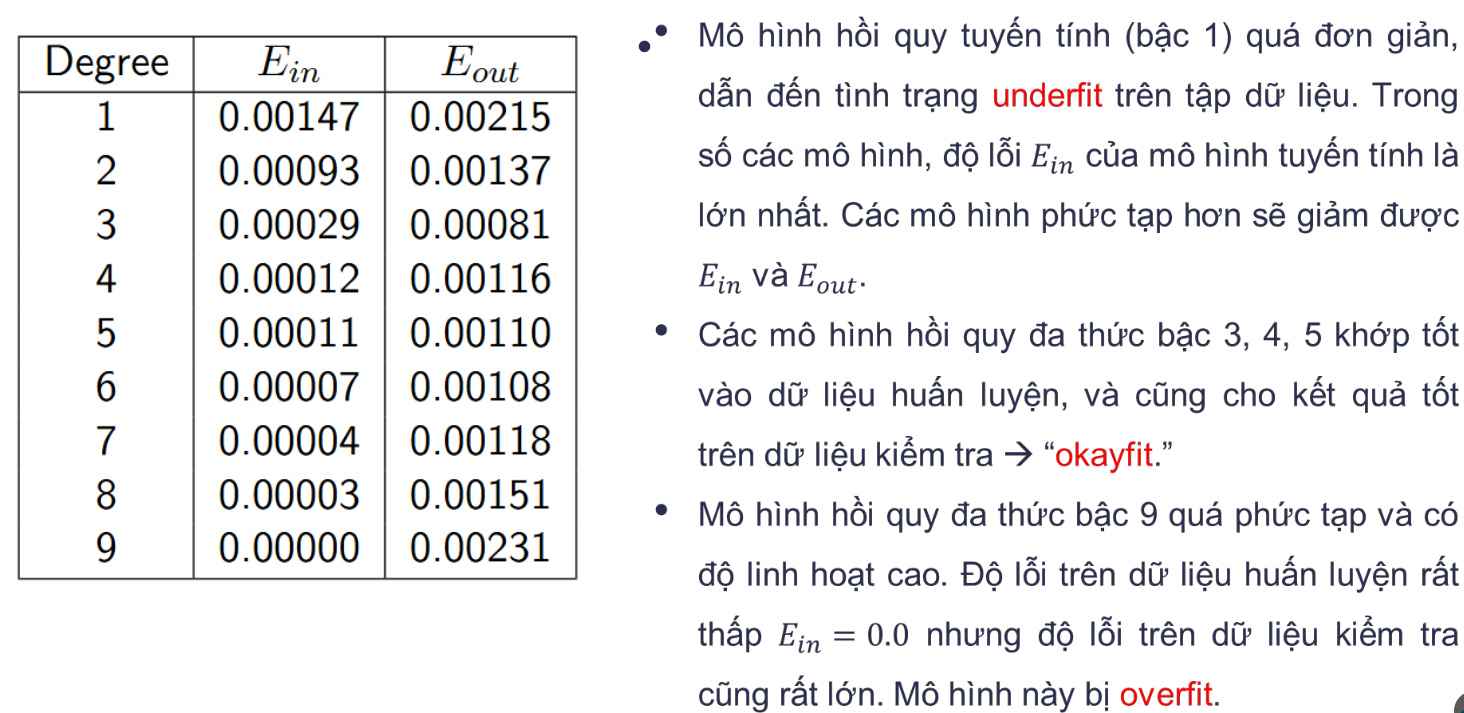

## Experiment 2: N = 100
Tương tự.
## Experiment 3: N = 1000
Tương tự.

## Nhận xét:
- Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến bias?
- Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến variance?
- Tăng kích thước tập train ảnh hưởng thế nào đến bias?
- Tăng kích thước tập train ảnh hưởng thế nào đến variance?

## 1. Định nghĩa các thư viện và các hàm sinh test, hàm mô hình, hàm tính trọng số mô hình, hàm tính MSE theo yêu cầu đề bài

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

np.random.seed(24520011)

In [2]:
def generate_dataset(N):
    x = np.random.rand(N)
    eps = np.random.randn(N) * 0.03
    y = np.sin(1 + x**2) + eps
    return x, y

## 2. Định nghĩa Mô hình

In [3]:
class Model_poly:
    def __init__(self, degree):
        self.degree = degree
        # Pipeline gồm 2 bước: tạo feature đa thức → hồi quy tuyến tính
        self.model = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=True),
            LinearRegression()
        )

    def fit(self, x_train, y_train):
        x_train = np.array(x_train).reshape(-1, 1)
        y_train = np.array(y_train)
        self.model.fit(x_train, y_train)

    def predict(self, x):
        x = np.array(x).reshape(-1, 1)
        return self.model.predict(x)

## 3. Định nghĩa hàm tính độ lỗi

In [4]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

## 4. Định nghĩa hàm vẽ mô hình cho 9 bậc

In [5]:
def plot_models(models_list, x_trains, y_trains, title="Datasets D1, D2, D3"):
    """
    models_list: list of list of models, e.g. [[models for D1], [models for D2], [models for D3]]
    x_trains, y_trains: list of (x_train, y_train) for each dataset
    """
    x_plot = np.linspace(0, 1, 200)
    plt.figure(figsize=(12, 8))

    num_degrees = len(models_list[0])  # 9 degrees
    colors = ['tab:blue', 'tab:orange', 'tab:green']  # 3 datasets
    labels = ['D1', 'D2', 'D3']

    for d in range(num_degrees):
        plt.subplot(3, 3, d + 1)

        # Đường f(x) thật
        plt.plot(x_plot, np.sin(1 + x_plot**2), 'k--', label='f(x)')

        # D1, D2, D3
        for i in range(3):
            model = models_list[i][d]
            x_train, y_train = x_trains[i], y_trains[i]
            model.fit(x_train, y_train)
            y_plot = model.predict(x_plot)

            plt.plot(x_plot, y_plot, color=colors[i], label=labels[i])
            plt.scatter(x_train, y_train, color=colors[i], s=10, alpha=0.6)

        plt.title(f"Degree {d+1}", fontsize=10)
        plt.xlabel("x", fontsize=9)
        plt.ylabel("y", fontsize=9)
        plt.grid(alpha=0.3)

    plt.suptitle(f"Polynomial Regression Comparison ({title})", fontsize=14)
    plt.legend(loc='upper right', fontsize=8)
    plt.tight_layout()
    plt.show()

In [6]:
def evaluate_dataset(models, x_train, y_train, x_test, y_test):
    records = []
    for i, model in enumerate(models):
        model.fit(x_train, y_train)
        e_in = mse(y_train, model.predict(x_train))
        e_out = mse(y_test, model.predict(x_test))
        records.append((i+1, e_in, e_out))
    df = pd.DataFrame(records, columns=['Degree', 'E_in', 'E_out'])
    return df

## 5. Experiment

In [7]:
def Experiment(N):
    # Tạo 3 dataset ngẫu nhiên
    D = [generate_dataset(N) for _ in range(3)]
    x_trains = [d[0] for d in D]
    y_trains = [d[1] for d in D]

    # Tạo model cho mỗi dataset
    models_list = []
    for x_train, y_train in D:
        models = [Model_poly(i+1) for i in range(9)]
        models_list.append(models)

    # Vẽ tất cả trong 1 hình
    plot_models(models_list, x_trains, y_trains, title=f"N={N}")

    # Nếu bạn muốn đánh giá dataset đầu tiên
    df_D1 = evaluate_dataset(models_list[0], x_trains[0], y_trains[0], *generate_dataset(N))
    display(df_D1)

### Experiment 1: N = 10

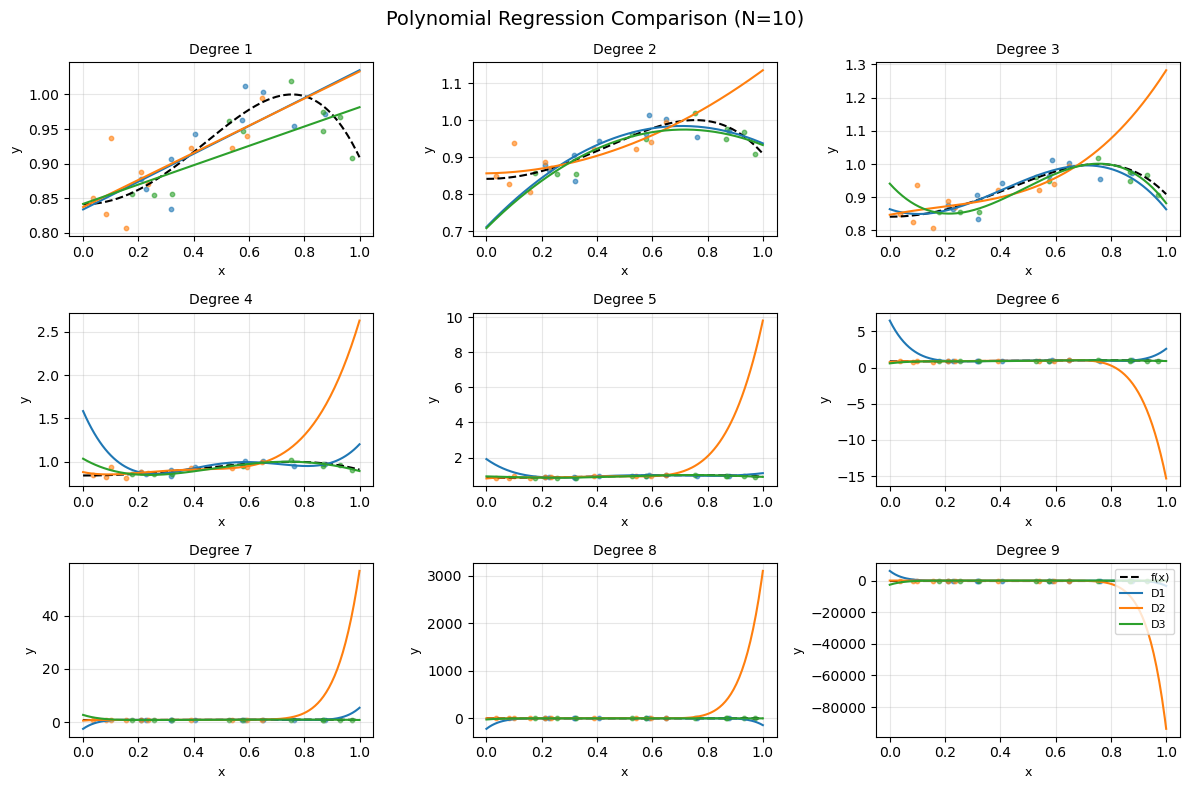

,Degree,E_in,E_out
0,1,1.304549e-03,1.094098e-03
1,2,8.211428e-04,2.270508e-03
2,3,7.313967e-04,1.343560e-03
3,4,4.536499e-04,5.382872e-02
4,5,4.504614e-04,1.063195e-01
5,6,4.029921e-04,2.658447e+00
6,7,3.834213e-04,7.831872e-01
7,8,3.293309e-04,3.603881e+03
8,9,1.730295e-17,2.747531e+06


In [8]:
Experiment(10)

### Experiment 2: N = 100

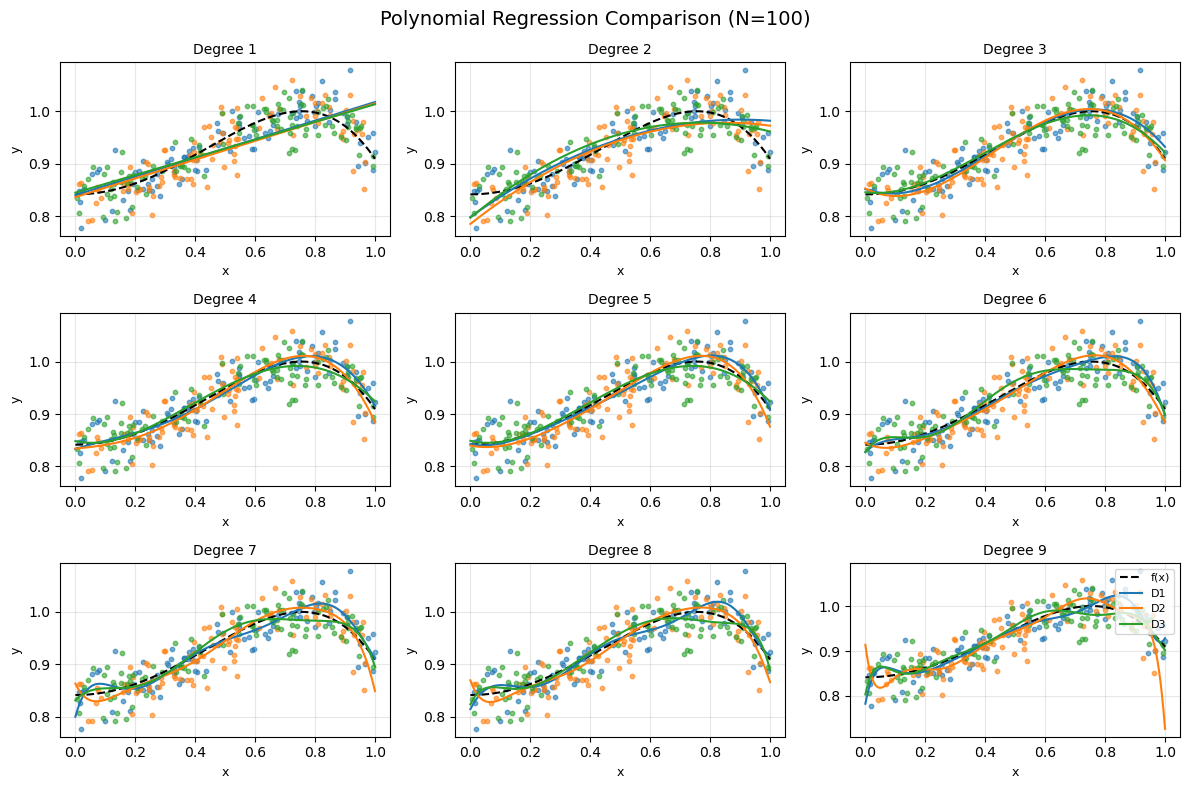

,Degree,E_in,E_out
0,1,0.001601,0.002139
1,2,0.001315,0.001471
2,3,0.000882,0.001109
3,4,0.000835,0.001192
4,5,0.000826,0.001199
5,6,0.000809,0.001241
6,7,0.000775,0.001236
7,8,0.000769,0.001213
8,9,0.000752,0.001258


In [9]:
Experiment(100)

### Experiment 3: N = 1000

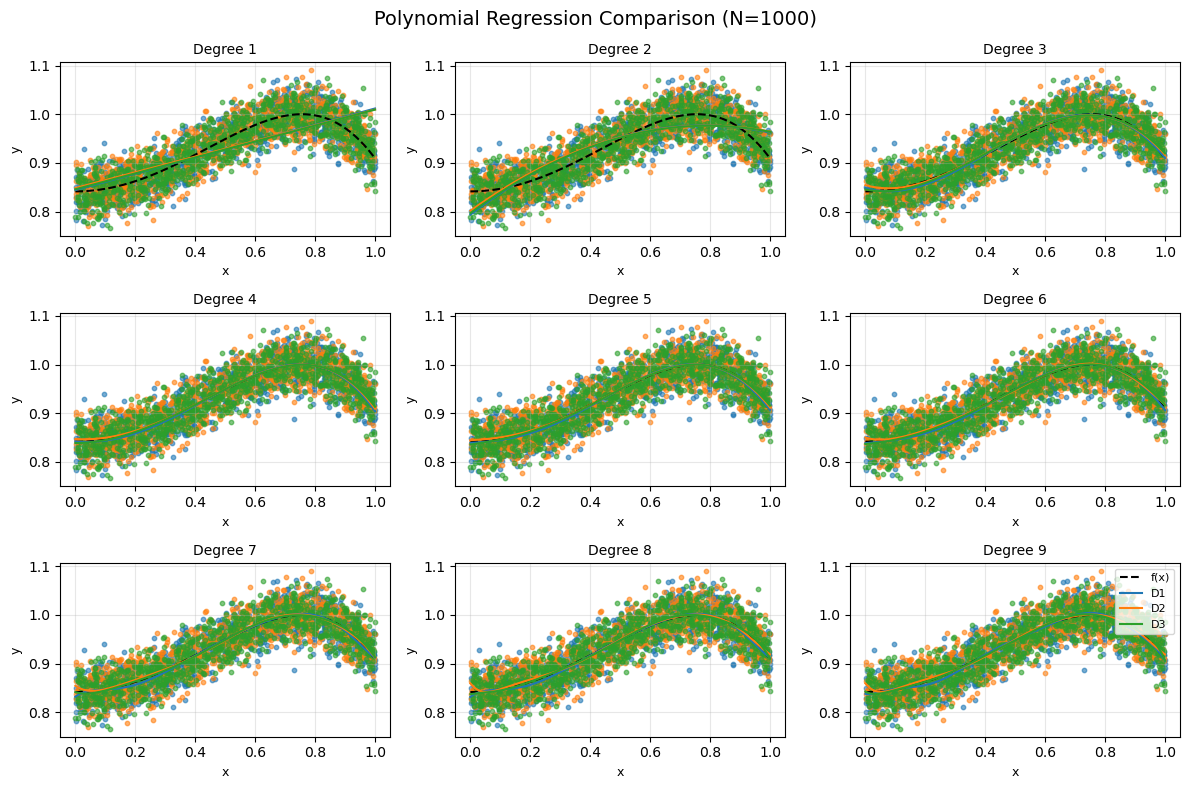

,Degree,E_in,E_out
0,1,0.001836,0.001830
1,2,0.001334,0.001331
2,3,0.000912,0.000951
3,4,0.000908,0.000941
4,5,0.000907,0.000941
5,6,0.000907,0.000941
6,7,0.000904,0.000943
7,8,0.000904,0.000943
8,9,0.000901,0.000941


In [10]:
Experiment(1000)

## 6. Nhận xét:

1. Tăng độ phức tạp của mô hình sẽ khiến bias mô hình nhỏ hơn -> mô hình fit với dữ liệu tốt hơn: 
2. Tăng độ phức tạp của mô hình sẽ khiến variance tăng -> mô hình nhạy cảm hơn với nhiễu -> dễ overfitting.
   - Ta quan sát thấy ở degree nhỏ, mô hình không khớp dữ liệu -> bias cao.
   - Ở degree lớn, E_in nhỏ nhưng E_out tăng mạnh -> bias thấp nhưng variance cao.
3. Khi tăng kích thước tập train thì Bias gần như không đổi (trong trường hợp mô hình đủ phức tạp). 
4. Khi tăng kích thước tập trian thì Variance giảm -> khiến mô hình ổn định hơn, $E_{out}$ gần $E_{in} hơn.